# Linear Regression of house price on Mortgage Rate


## Import dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
import mitosheet
from datetime import datetime

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Table 1: Mortgage Rate Table 

In [4]:
mitosheet.sheet()

MitoWidget(analysis_data_json='{"analysisName": "UUID-43008f96-0225-4b29-8f7b-90850913d07d", "code": {"imports…

In [5]:
from mitosheet import *; register_analysis('UUID-18eca8ca-9187-4f3d-ad57-c2234e59c069')

# import mortgage30US.csv
import pandas as pd
MORTGAGE30US_csv = pd.read_csv(r'C:\Users\shliu\Documents\Class\Migration_and_Housing\Resources\MORTGAGE30US.csv')

# Changed DATE from object to datetime
import pandas as pd
MORTGAGE30US_csv['DATE'] = pd.to_datetime(MORTGAGE30US_csv['DATE'], infer_datetime_format=True, errors='coerce')

# Added column new-column-dcm7 to MORTGAGE30US_csv
MORTGAGE30US_csv.insert(1, 'new-column-dcm7', 0)

# Renamed new-column-dcm7 to Quarter in MORTGAGE30US_csv
MORTGAGE30US_csv.rename(columns={'new-column-dcm7': 'Quarter'}, inplace=True)

# Set new-column-dcm7 in MORTGAGE30US_csv to =YEAR(DATE)
MORTGAGE30US_csv['Quarter'] = YEAR(MORTGAGE30US_csv['DATE'])

# Renamed new-column-dcm7 to YEAR in MORTGAGE30US_csv
MORTGAGE30US_csv.rename(columns={'Quarter': 'YEAR'}, inplace=True)


In [6]:
# Make a new column 'Quarter' in MORTGAGE30US csv 
MORTGAGE30US_csv['quarter'] = MORTGAGE30US_csv['DATE'].dt.quarter


In [7]:
MORTGAGE30US_csv.head()

,DATE,YEAR,MORTGAGE30US,quarter
0,1971-04-02,1971,7.33,2
1,1971-04-09,1971,7.31,2
2,1971-04-16,1971,7.31,2
3,1971-04-23,1971,7.31,2
4,1971-04-30,1971,7.29,2


In [8]:
import mitosheet
mitosheet.sheet(MORTGAGE30US_csv, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-6d360aca-61ec-4f7e-b7c4-1ab9163e57c3", "code": {"imports…

In [9]:
from mitosheet import *; register_analysis('UUID-85d7fdf3-2be5-4185-95b6-8c638e2dbcb4')

# Reordered quarter in MORTGAGE30US_csv
MORTGAGE30US_csv_columns = [col for col in MORTGAGE30US_csv.columns if col != 'quarter']
MORTGAGE30US_csv_columns.insert(1, 'quarter')
MORTGAGE30US_csv = MORTGAGE30US_csv[MORTGAGE30US_csv_columns]

# Reordered quarter in MORTGAGE30US_csv
MORTGAGE30US_csv_columns = [col for col in MORTGAGE30US_csv.columns if col != 'quarter']
MORTGAGE30US_csv_columns.insert(1, 'quarter')
MORTGAGE30US_csv = MORTGAGE30US_csv[MORTGAGE30US_csv_columns]


In [10]:
MORTGAGE30US_csv.head()

,DATE,quarter,YEAR,MORTGAGE30US
0,1971-04-02,2,1971,7.33
1,1971-04-09,2,1971,7.31
2,1971-04-16,2,1971,7.31
3,1971-04-23,2,1971,7.31
4,1971-04-30,2,1971,7.29


In [11]:
# Combine multiple column values into a single column: http://net-informations.com/ds/pd/comb.htm
MORTGAGE30US_csv['Quarter_Year'] = MORTGAGE30US_csv['quarter'].astype(str) + 'Q' + MORTGAGE30US_csv['YEAR'].astype(str)
MORTGAGE30US_csv

,DATE,quarter,YEAR,MORTGAGE30US,Quarter_Year
0,1971-04-02,2,1971,7.33,2Q1971
1,1971-04-09,2,1971,7.31,2Q1971
2,1971-04-16,2,1971,7.31,2Q1971
3,1971-04-23,2,1971,7.31,2Q1971
4,1971-04-30,2,1971,7.29,2Q1971
...,...,...,...,...,...
2645,2021-12-09,4,2021,3.10,4Q2021
2646,2021-12-16,4,2021,3.12,4Q2021
2647,2021-12-23,4,2021,3.05,4Q2021
2648,2021-12-30,4,2021,3.11,4Q2021


In [12]:
# Example groupby https://stackoverflow.com/questions/49771181/how-can-i-calculate-quarterly-average-in-python-if-i-have-values-for-each-month
# Groupby into dataframe https://technology.amis.nl/data-analytics/convert-groupby-result-on-pandas-data-frame-into-a-data-frame-using-to_frame/
Q_MORTGAGE30US = MORTGAGE30US_csv.groupby(['Quarter_Year'])['MORTGAGE30US'].mean().to_frame(name = 'Avg_Q_Mortgage').reset_index()
Q_MORTGAGE30US

,Quarter_Year,Avg_Q_Mortgage
0,1Q1972,7.349231
1,1Q1973,7.446154
2,1Q1974,8.462308
3,1Q1975,9.168462
4,1Q1976,8.873077
...,...,...
199,4Q2017,3.922308
200,4Q2018,4.784615
201,4Q2019,3.700000
202,4Q2020,2.760714


## Table 2: House Price Table

In [13]:
mitosheet.sheet()

MitoWidget(analysis_data_json='{"analysisName": "UUID-08fb8b41-4130-46ac-b13d-3098e49efbe7", "code": {"imports…

In [14]:
from mitosheet import *; register_analysis('UUID-65783015-d2c4-405b-b95a-7ed7e820d53b')

import pandas as pd
USSTHPI_csv = pd.read_csv(r'C:\Users\shliu\Documents\Class\Migration_and_Housing\Resources\USSTHPI.csv')

# Changed DATE from object to datetime
import pandas as pd
USSTHPI_csv['DATE'] = pd.to_datetime(USSTHPI_csv['DATE'], infer_datetime_format=True, errors='coerce')

# Added column new-column-4lw1 to USSTHPI_csv
USSTHPI_csv.insert(2, 'new-column-4lw1', 0)

# Reordered new-column-4lw1 in USSTHPI_csv
USSTHPI_csv_columns = [col for col in USSTHPI_csv.columns if col != 'new-column-4lw1']
USSTHPI_csv_columns.insert(2, 'new-column-4lw1')
USSTHPI_csv = USSTHPI_csv[USSTHPI_csv_columns]

# Renamed new-column-4lw1 to YEAR in USSTHPI_csv
USSTHPI_csv.rename(columns={'new-column-4lw1': 'YEAR'}, inplace=True)

# Added column new-column-9zd8 to USSTHPI_csv
USSTHPI_csv.insert(3, 'new-column-9zd8', 0)

# Renamed new-column-9zd8 to quarter in USSTHPI_csv
USSTHPI_csv.rename(columns={'new-column-9zd8': 'quarter'}, inplace=True)

# Added column new-column-u3ry to USSTHPI_csv
USSTHPI_csv.insert(4, 'new-column-u3ry', 0)

# Renamed new-column-u3ry to Quarter_Year in USSTHPI_csv
USSTHPI_csv.rename(columns={'new-column-u3ry': 'Quarter_Year'}, inplace=True)

# Set new-column-4lw1 in USSTHPI_csv to =YEAR(DATE)
USSTHPI_csv['YEAR'] = YEAR(USSTHPI_csv['DATE'])


In [15]:
# Make new column "Quarter" in USSTHPI dataframe
USSTHPI_csv['quarter'] = USSTHPI_csv['DATE'].dt.quarter
USSTHPI_csv

,DATE,USSTHPI,YEAR,quarter,Quarter_Year
0,1975-01-01,59.86,1975,1,0
1,1975-04-01,60.85,1975,2,0
2,1975-07-01,61.16,1975,3,0
3,1975-10-01,62.24,1975,4,0
4,1976-01-01,62.88,1976,1,0
...,...,...,...,...,...
182,2020-07-01,463.49,2020,3,0
183,2020-10-01,473.58,2020,4,0
184,2021-01-01,484.41,2021,1,0
185,2021-04-01,510.86,2021,2,0


In [16]:
# Set the quarter_year column as format #Q_Year
USSTHPI_csv['Quarter_Year'] = USSTHPI_csv['quarter'].astype(str) + 'Q' + USSTHPI_csv['YEAR'].astype(str)
USSTHPI_csv

,DATE,USSTHPI,YEAR,quarter,Quarter_Year
0,1975-01-01,59.86,1975,1,1Q1975
1,1975-04-01,60.85,1975,2,2Q1975
2,1975-07-01,61.16,1975,3,3Q1975
3,1975-10-01,62.24,1975,4,4Q1975
4,1976-01-01,62.88,1976,1,1Q1976
...,...,...,...,...,...
182,2020-07-01,463.49,2020,3,3Q2020
183,2020-10-01,473.58,2020,4,4Q2020
184,2021-01-01,484.41,2021,1,1Q2021
185,2021-04-01,510.86,2021,2,2Q2021


In [17]:
mitosheet.sheet(USSTHPI_csv, Q_MORTGAGE30US)

MitoWidget(analysis_data_json='{"analysisName": "UUID-6a7e08de-fe9d-40e8-9d33-46bd9184f4ab", "code": {"imports…

## Table 3: Merge Table of Housing Price and Mortgage Rate Table

In [18]:
from mitosheet import *; register_analysis('UUID-5ea90577-0aad-48dc-abe4-ef00971f2ae1')

# Merged USSTHPI_csv and Q_MORTGAGE30US
USSTHPI_csv_tmp = USSTHPI_csv.drop(['quarter', 'YEAR', 'DATE'], axis=1)
df3 = USSTHPI_csv_tmp.merge(Q_MORTGAGE30US, left_on=['Quarter_Year'], right_on=['Quarter_Year'], how='inner', suffixes=['_USSTHPI_csv', '_Q_MORTGAGE30US'])

# Reordered Quarter_Year in df3
df3_columns = [col for col in df3.columns if col != 'Quarter_Year']
df3_columns.insert(0, 'Quarter_Year')
df3 = df3[df3_columns]

# Renamed df3 to HPI_mortgage
HPI_mortgage = df3


In [19]:
HPI_mortgage.head()


,Quarter_Year,USSTHPI,Avg_Q_Mortgage
0,1Q1975,59.86,9.168462
1,2Q1975,60.85,8.875385
2,3Q1975,61.16,8.983846
3,4Q1975,62.24,9.160769
4,1Q1976,62.88,8.873077


In [20]:
import mitosheet
mitosheet.sheet(HPI_mortgage, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-b9ec17b4-d873-4fe9-8ae3-af22c9713c78", "code": {"imports…

In [21]:
# Descriptive statistics
HPI_mortgage.describe()

,USSTHPI,Avg_Q_Mortgage
count,187.000000,187.000000
mean,238.514171,7.806211
std,117.692044,3.398563
min,59.860000,2.760714
25%,138.635000,4.959071
50%,209.850000,7.295833
75%,336.110000,9.786923
max,539.530000,17.735714


## Create linear regression model

In [22]:
# Set X to HPI Data, set Y to MORTGAGE data 
X = HPI_mortgage['USSTHPI'].values.reshape(-1, 1)
y = HPI_mortgage['Avg_Q_Mortgage']


In [23]:
X.shape

(187, 1)

In [24]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [25]:
# use linear regression model to train x and y variables
model = LinearRegression()
model.fit(X_train, y_train)
# define y_pred and use model.predict to evaluate the model's prediction 
y_pred = model.predict(X_test)
print(y_pred.shape)

(47,)


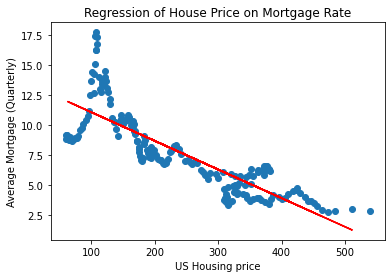

In [26]:
# plot the linear regression model 
linear_regression = plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')

# Import the style from Matplotlib.
from matplotlib import style

plt.xlabel('US Housing price')
plt.ylabel('Average Mortgage (Quarterly)')
plt.title('Regression of House Price on Mortgage Rate')
plt.savefig('Images/linear_regression_HPI_vs_MORTGAGE.png')
plt.show()

## Evaluate model quality

In [27]:
# print prediction results 
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R2:', r2_score(y_test, y_pred))
print('mean squared error:', mean_squared_error(y_test, y_pred))

Coefficients: [-0.02387254]
Intercept: 13.461952429057305
R2: 0.6847776546712383
mean squared error: 3.6414870353137014
